In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


torch.Size([3, 224, 224])


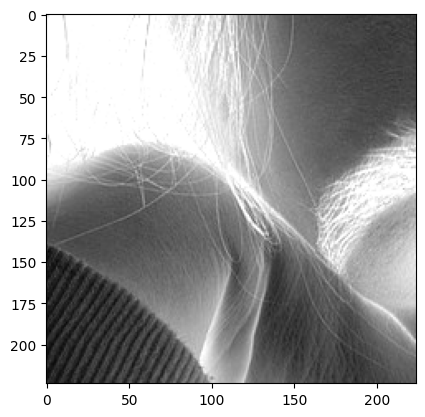

In [123]:
from data import get_img_transforms_train, BigImagesDataset, get_label_transforms
import config.config as config
import matplotlib.pyplot as plt
from utils import convert_rgb_tensor_for_plot


train_transforms = get_img_transforms_train(224)
target_transforms = get_label_transforms()
ds_train = BigImagesDataset(str(config.TRAINING_IMGS_DIR), train_transforms, target_transforms)

plt.imshow(convert_rgb_tensor_for_plot(ds_train[100][0]))
print(ds_train[0][0].shape)